In [7]:
import seaborn as sns
import pandas as pd
from matplotlib.patches import PathPatch
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set()

infile = "../img/functionRuntimesEcomm.pkl"
outfile = "../img/fig6_functionRuntimes.pdf"

rename = [
    ["/product/:productId","getProduct()"],
    ["/addCartItem","addItem()"],
    ["/cart","getCart()"],
    ["/checkout","checkout()"],
    ["aws","AWS"],
    ["azure","Azure"],
    ["google","GCP"]
]
delete = {"/setUser", "/test", "/"}

print("Setup done.")

Setup done.


In [8]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 3)
sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

sns initialized.


In [9]:
df_calls = pd.read_pickle(infile)
df_calls.head()
#print("Number of function calls:")
#df_calls['function'].value_counts()
#sns.catplot(x="function", hue="plattform", kind="count", data=df_calls, height=5, aspect=3)

,function,duration,plattform
id,,,
50eiztzf,/setUser,2.861503,aws
87adsaks,/,408.160138,aws
7q2pl43z,/setUser,0.342887,aws
auc39v1z,/product/:productId,1159.067847,aws
ukuuryrg,/product/:productId,233.554525,aws


In [10]:
#Delete data as specified
for toRemove in delete:
    df_calls = df_calls[df_calls.function != toRemove]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()

old:/product/:productId, new:getProduct()
old:/addCartItem, new:addItem()
old:/cart, new:getCart()
old:/checkout, new:checkout()
old:aws, new:AWS
old:azure, new:Azure
old:google, new:GCP


,function,duration,plattform
id,,,
auc39v1z,getProduct(),1159.067847,AWS
ukuuryrg,getProduct(),233.554525,AWS
77a0bgfj,addItem(),1494.412529,AWS
mnz3b07t,addItem(),161.104182,AWS
hremjnji,getProduct(),285.320735,AWS


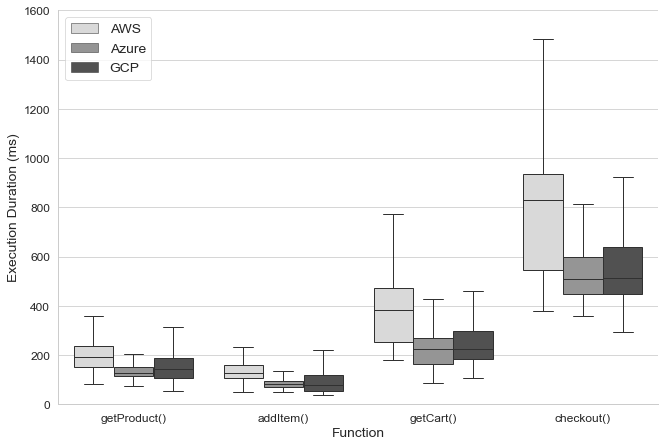

In [11]:
def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    (https://github.com/mwaskom/seaborn/issues/1076)
    """

    # iterating through Axes instances
    for ax in g.axes:
        # iterating through axes artists:
        for c in ax.get_children():
            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)
                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

plot = sns.catplot(x="function", y="duration", hue="plattform", kind="box", data=df_calls,
                   height=6, aspect=1.5, sym="", legend=False, linewidth=1,
                   hue_order=["AWS","Azure","GCP"])
#adjust_box_widths(plot, 0.9)
plot.set_xlabels(label = "Function", fontsize="x-large")
plot.set_ylabels(label = "Execution Duration (ms)", fontsize="x-large")
plot.set_yticklabels(size = 12)
plot.set_xticklabels(size = 12)
plot.set(ylim=(0, None))

plot.ax.legend(loc=2, fontsize="x-large")

plot.savefig(outfile)

In [12]:
#sns.catplot(x="function", y="duration", hue="plattform", kind="violin", data=df_calls, height=5, aspect=3)

